In [2]:
import numpy as np
from numpy.fft import fft, fftfreq, fftshift, rfft, rfftfreq
import matplotlib.pyplot as plt
import scipy.signal as sig
%matplotlib inline

(0, 4000)

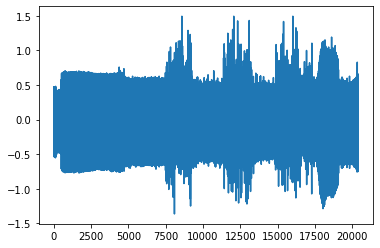

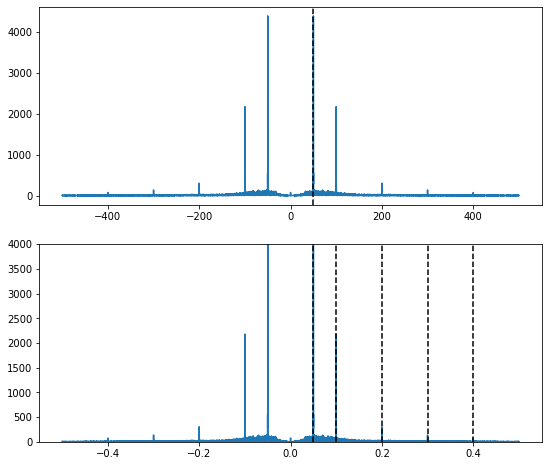

In [23]:
fs=1000
my_data =np.loadtxt('recordings/segundaprueba.csv')
ecg = my_data[:,-1]
ecg = (ecg / 2**10 -0.5) * 3.3 /1100 *1000

time = np.arange(len(ecg))
freq =fftfreq(len(time))

ecg_freq = fft(ecg)

plt.figure(1)
plt.plot(time,ecg)
plt.figure(figsize=(9,8))
plt.subplot(211)
plt.plot(fftshift(freq)*fs,fftshift(np.abs(ecg_freq)))
plt.axvline(50, color='k', linestyle='--')
plt.subplot(212)
plt.plot(fftshift(freq),fftshift(np.abs(ecg_freq)))
plt.axvline(50/fs, color='k', linestyle='--')
plt.axvline(2*50/fs, color='k', linestyle='--')
plt.axvline(4*50/fs, color='k', linestyle='--')
plt.axvline(6*50/fs, color='k', linestyle='--')
plt.axvline(8*50/fs, color='k', linestyle='--')
plt.ylim(0, 4000)

C:\Users\juanb\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


(0, 4000)

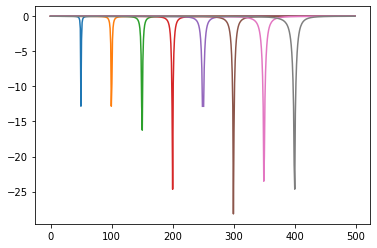

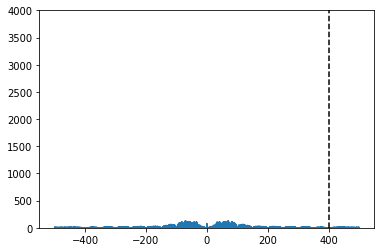

In [29]:

for k in 1,2,3,4,5,6,7,8:
    f0 = 50.0
    Q = 30.0
    w0 = k*f0/(fs/2)
    b, a = sig.iirnotch(w0, Q)
    w, h = sig.freqz(b, a)
    plt.figure(1)
    plt.plot(w/(2 * np.pi)*fs,20*np.log10(np.abs(h)))
    ecg = sig.filtfilt(b,a,ecg)
plt.figure(2)    
ecg_filt_freq = np.fft.fft(ecg)
plt.plot(np.fft.fftshift(freq)*fs,np.fft.fftshift(np.abs(ecg_filt_freq)))
plt.axvline(k*f0, color='k', linestyle='--')
plt.ylim(0, 4000)